# Popularity Regression 2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.dates as mdates
import plotly.express as px
from plotly.subplots import make_subplots
warnings.filterwarnings("ignore")
#pd.set_option('display.float_format', lambda x: '%0.9f' % x)
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
%matplotlib inline

In [ ]:
path_to_protocol5='./dataset_/dataset_cleaned_popularity.pkl'

In [ ]:
!pip3 install pickle5
import pickle5 as pickle
with open(path_to_protocol5, "rb") as fh:
  df = pickle.load(fh)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 4.3 MB/s 


In [ ]:
df.drop(columns=['index', 'level_0'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head(5)

,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,...,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster,duration_min,release_year,release_month,release_day
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,1,0,10,1.0,1.0,global,4.31065,2018,11,5
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,1,0,191,0.0,0.0,english speaking and nordic,4.31065,2018,11,5
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,1,0,1,1.0,1.0,spanish speaking,4.31065,2018,11,5
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,1,0,126,0.0,0.0,english speaking and nordic,4.31065,2018,11,5
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,1,0,21,0.0,1.0,english speaking and nordic,4.31065,2018,11,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166681 entries, 0 to 166680
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   country              166681 non-null  object 
 1   uri                  166681 non-null  object 
 2   popularity           166681 non-null  float64
 3   title                166681 non-null  object 
 4   artist               166681 non-null  object 
 5   release_type         166681 non-null  object 
 6   sub_genre            166681 non-null  object 
 7   artist_followers     166681 non-null  float64
 8   explicit             166681 non-null  object 
 9   album                166681 non-null  object 
 10  release_date         166681 non-null  object 
 11  track_number         166681 non-null  object 
 12  tracks_in_album      166681 non-null  object 
 13  danceability         166681 non-null  float64
 14  energy               166681 non-null  float64
 15  key              

In [ ]:
df.columns

Index(['country', 'uri', 'popularity', 'title', 'artist', 'release_type',
       'sub_genre', 'artist_followers', 'explicit', 'album', 'release_date',
       'track_number', 'tracks_in_album', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acoustics', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'genre',
       'days_since_release', 'released_after_2017', 'explicit_false',
       'explicit_true', 'popu_max', 'top10_dummy', 'top50_dummy', 'cluster',
       'duration_min', 'release_year', 'release_month', 'release_day'],
      dtype='object')

In [ ]:
df = df.groupby(['title', 'artist', 'release_type', 'sub_genre', 'artist_followers', 'explicit', 'album', 'track_number', 'tracks_in_album', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acoustics', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'genre', 'duration_min'])['popularity'].sum().reset_index(name='popularity')
df.sort_values(by='popularity', ascending=False).head(5)

,title,artist,release_type,sub_genre,artist_followers,explicit,album,track_number,tracks_in_album,danceability,...,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,duration_min,popularity
44347,shape of you,Ed Sheeran,album,pop,71783101.0,False,÷ (Deluxe),4,16,0.825,...,0.0802,0.581,0.000000,0.0931,0.931,95.977,4,pop,3.895217,5732932.35
11084,dance monkey,Tones And I,single,australian pop,2283019.0,False,Dance Monkey,1,1,0.825,...,0.0988,0.688,0.000161,0.1700,0.540,98.078,4,pop,3.495917,3624590.65
38649,perfect,Ed Sheeran,album,pop,71783101.0,False,÷ (Deluxe),5,16,0.599,...,0.0232,0.163,0.000000,0.1060,0.168,95.050,3,pop,4.390000,2933691.50
4479,bad guy,Billie Eilish,album,electropop,34697267.0,False,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2,14,0.701,...,0.3750,0.328,0.130000,0.1000,0.562,135.128,4,pop,3.234800,2812179.25
44321,shallow,Lady Gaga - Bradley Cooper,album,dance pop,14439685.0,False,A Star Is Born Soundtrack,12,34,0.572,...,0.0308,0.371,0.000000,0.2310,0.323,95.799,4,pop,3.595550,2600171.85


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59467 entries, 0 to 59466
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             59467 non-null  object 
 1   artist            59467 non-null  object 
 2   release_type      59467 non-null  object 
 3   sub_genre         59467 non-null  object 
 4   artist_followers  59467 non-null  float64
 5   explicit          59467 non-null  object 
 6   album             59467 non-null  object 
 7   track_number      59467 non-null  object 
 8   tracks_in_album   59467 non-null  object 
 9   danceability      59467 non-null  float64
 10  energy            59467 non-null  float64
 11  key               59467 non-null  object 
 12  loudness          59467 non-null  float64
 13  mode              59467 non-null  object 
 14  speechiness       59467 non-null  float64
 15  acoustics         59467 non-null  float64
 16  instrumentalness  59467 non-null  float6

In [ ]:
df_pred = df.copy()

In [ ]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59467 entries, 0 to 59466
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             59467 non-null  object 
 1   artist            59467 non-null  object 
 2   release_type      59467 non-null  object 
 3   sub_genre         59467 non-null  object 
 4   artist_followers  59467 non-null  float64
 5   explicit          59467 non-null  object 
 6   album             59467 non-null  object 
 7   track_number      59467 non-null  object 
 8   tracks_in_album   59467 non-null  object 
 9   danceability      59467 non-null  float64
 10  energy            59467 non-null  float64
 11  key               59467 non-null  object 
 12  loudness          59467 non-null  float64
 13  mode              59467 non-null  object 
 14  speechiness       59467 non-null  float64
 15  acoustics         59467 non-null  float64
 16  instrumentalness  59467 non-null  float6

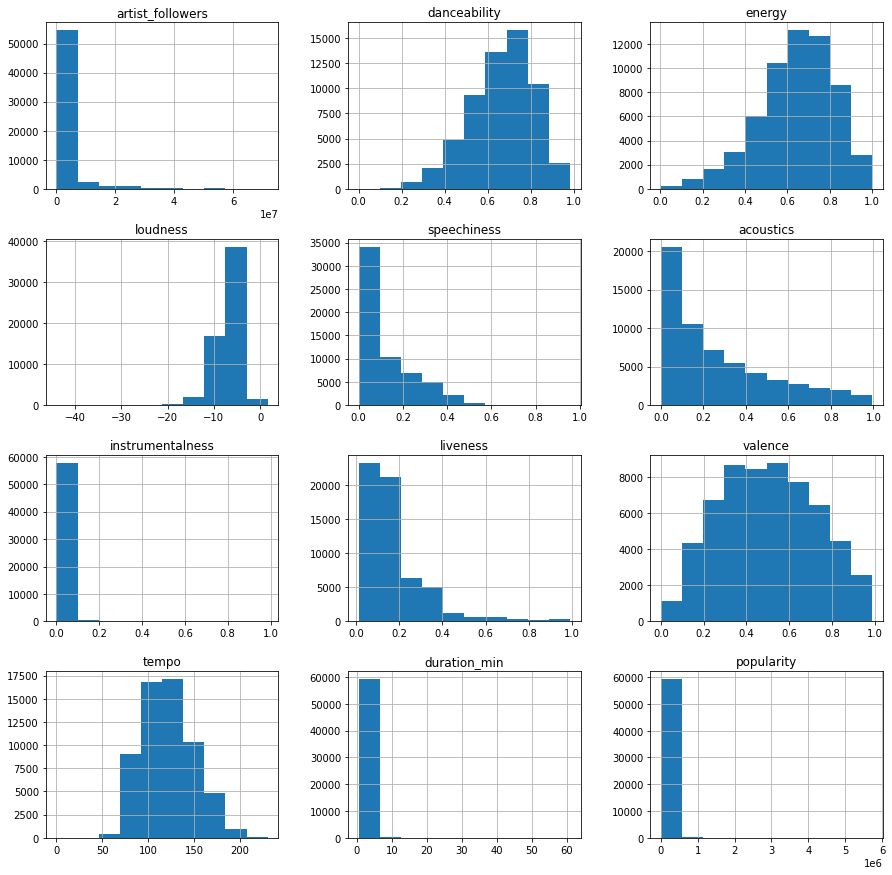

In [ ]:
df.hist(figsize = (15,15))
plt.show()

## Logarithmic Transformation

In [ ]:
print('popularity:',df['popularity'].skew())
print('artist_followers:',df['artist_followers'].skew())
print('danceability:',df['danceability'].skew())
print('energy:',df['energy'].skew())
print('loudness:',df['loudness'].skew())
print('speechiness:',df['speechiness'].skew())
print('acoustics:',df['acoustics'].skew())
print('instrumentalness:',df['instrumentalness'].skew())
print('liveness:',df['liveness'].skew())
print('valence:',df['valence'].skew())
print('tempo:',df['tempo'].skew())

popularity: 17.785842557052366
artist_followers: 5.313004621992586
danceability: -0.5401994661138162
energy: -0.586986845344528
loudness: -1.587035638887538
speechiness: 1.6971729734537973
acoustics: 1.0018071553550227
instrumentalness: 7.920436134144119
liveness: 2.524366559628569
valence: 0.08670467553566456
tempo: 0.4239893740392569


In [ ]:
column_right_skewed = ['duration_min', 'liveness', 'artist_followers', 'popularity']
for col in column_right_skewed:
    df_pred[col] = np.log(df_pred[col])

In [ ]:
column_right_skewed = ['speechiness','acoustics','instrumentalness']
for col in column_right_skewed:
    df_pred[col] = np.log1p(df_pred[col])

In [ ]:
#POWER TRANSFORMER FOR LEFT SKEWED FEATURES
#from sklearn.preprocessing import PowerTransformer
#pt = PowerTransformer(method = 'yeo-johnson')
#df_pred['instrumentalness'] = pt.fit_transform(df_pred['instrumentalness'].values.reshape(-1,1))

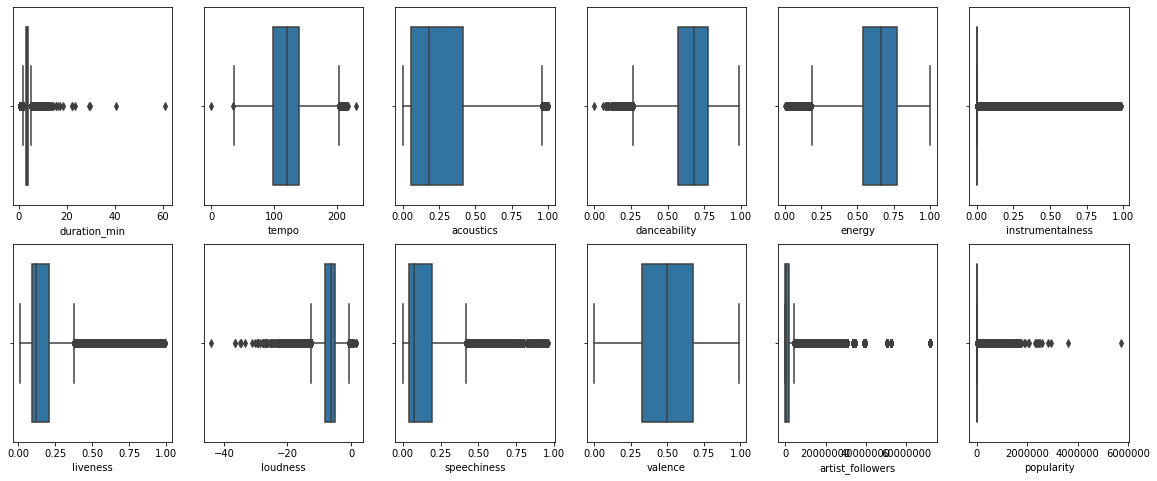

In [ ]:
f, axes = plt.subplots(2, 6)
f.set_size_inches(20, 8)
sns.boxplot(df['duration_min'], orient='v', ax=axes[0, 0])
sns.boxplot(df['tempo'], orient='v', ax=axes[0, 1])
sns.boxplot(df['acoustics'], orient='v', ax=axes[0, 2])
sns.boxplot(df['danceability'], orient='v', ax=axes[0, 3])
sns.boxplot(df['energy'], orient='v', ax=axes[0, 4])
sns.boxplot(df['instrumentalness'], orient='v', ax=axes[0, 5])
sns.boxplot(df['liveness'], orient='v', ax=axes[1, 0])
sns.boxplot(df['loudness'], orient='v', ax=axes[1, 1])
sns.boxplot(df['speechiness'], orient='v', ax=axes[1, 2])
sns.boxplot(df['valence'], orient='v', ax=axes[1, 3])
sns.boxplot(df['artist_followers'], orient='v', ax=axes[1, 4])
sns.boxplot(df['popularity'], orient='v', ax=axes[1, 5])
axes[1, 5].get_xaxis().get_major_formatter().set_scientific(False)
axes[1, 4].get_xaxis().get_major_formatter().set_scientific(False)


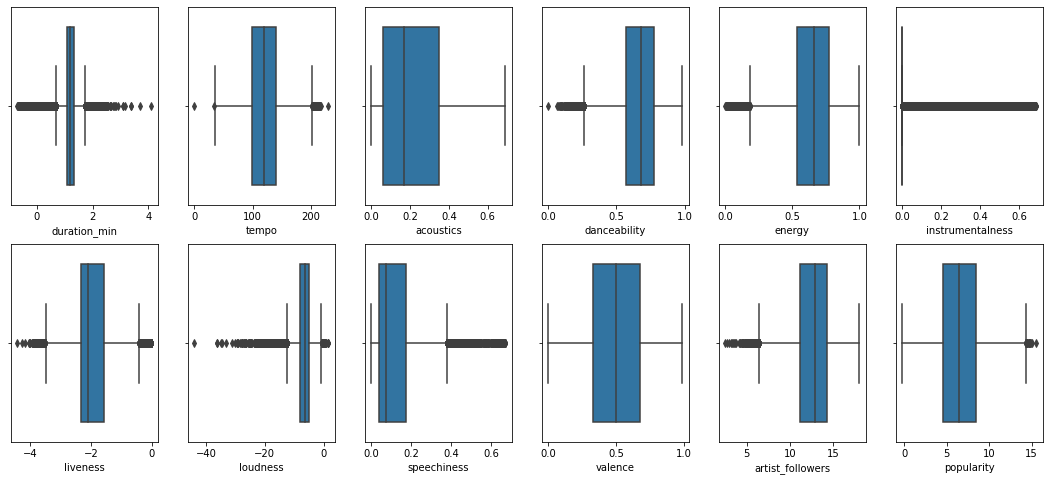

In [ ]:
f, axes = plt.subplots(2, 6)
f.set_size_inches(18.5, 8)
sns.boxplot(df_pred['duration_min'], orient='v', ax=axes[0, 0])
sns.boxplot(df_pred['tempo'], orient='v', ax=axes[0, 1])
sns.boxplot(df_pred['acoustics'], orient='v', ax=axes[0, 2])
sns.boxplot(df_pred['danceability'], orient='v', ax=axes[0, 3])
sns.boxplot(df_pred['energy'], orient='v', ax=axes[0, 4])
sns.boxplot(df_pred['instrumentalness'], orient='v', ax=axes[0, 5])
sns.boxplot(df_pred['liveness'], orient='v', ax=axes[1, 0])
sns.boxplot(df_pred['loudness'], orient='v', ax=axes[1, 1])
sns.boxplot(df_pred['speechiness'], orient='v', ax=axes[1, 2])
sns.boxplot(df_pred['valence'], orient='v', ax=axes[1, 3])
sns.boxplot(df_pred['artist_followers'], orient='v', ax=axes[1, 4])
sns.boxplot(df_pred['popularity'], orient='v', ax=axes[1, 5])


In [ ]:
df_pred['key'] = df_pred['key'].astype(int)
df_pred['mode'] = df_pred['mode'].astype(int)
df_pred['time_signature'] = df_pred['time_signature'].astype(float)

In [ ]:
numerical_cols=df_pred.select_dtypes(include=['float64','int64']).columns.tolist()
categorical_cols=df_pred.select_dtypes(include=['object']).columns.tolist()

In [ ]:
categorical_cols

['title',
 'artist',
 'release_type',
 'sub_genre',
 'explicit',
 'album',
 'track_number',
 'tracks_in_album',
 'key',
 'mode',
 'time_signature',
 'genre']

In [ ]:
['title', 'artist', 'release_type', 'sub_genre', 'album', 'tracks_in_album','key', 'mode','genre']


## Boxplot of log-transformed features

Text(0.5, 1.0, 'Duration Minute Feature Before Log Transformation')

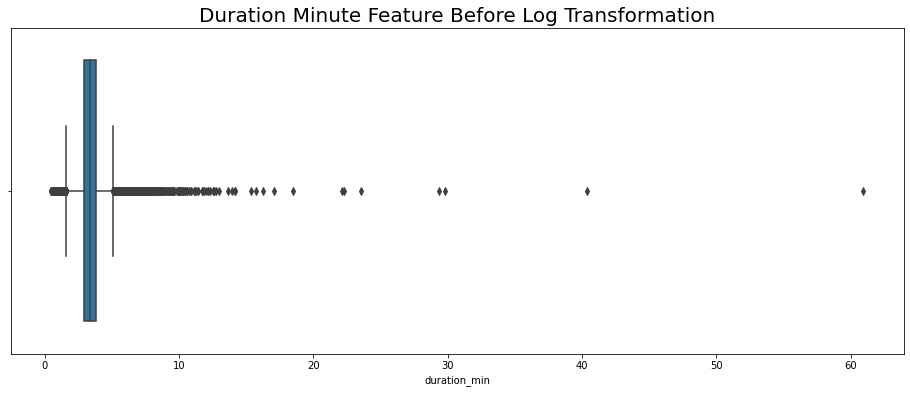

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(df['duration_min']) 
ax.set_title('Duration Minute Feature Before Log Transformation' , fontsize=20)

Text(0.5, 1.0, 'Duration Minute Feature After Log Transformation')

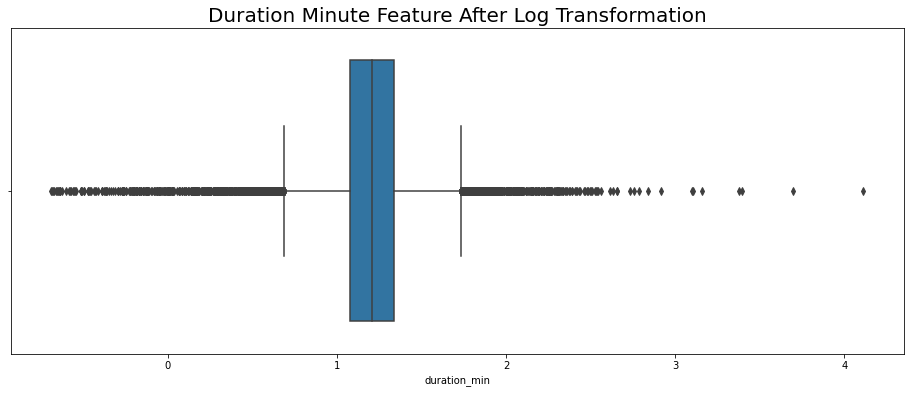

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(df_pred['duration_min']) 
ax.set_title('Duration Minute Feature After Log Transformation' , fontsize=20)

Text(0.5, 1.0, 'Liveness Feature Before Log Transformation')

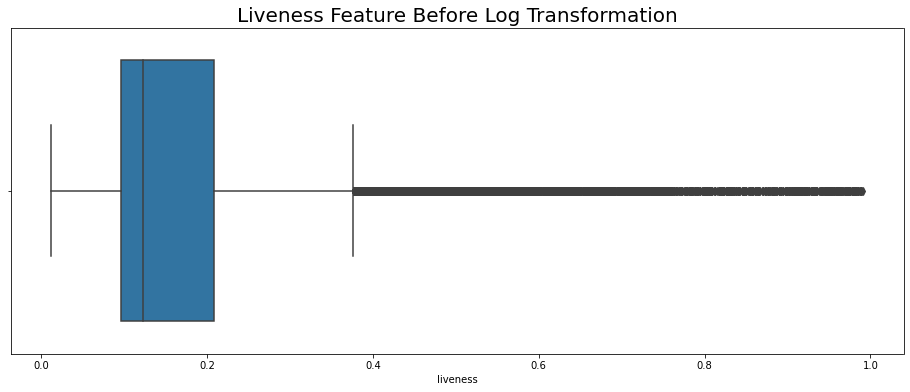

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(df['liveness']) 
ax.set_title('Liveness Feature Before Log Transformation' , fontsize=20)

Text(0.5, 1.0, 'Liveness Feature After Log Transformation')

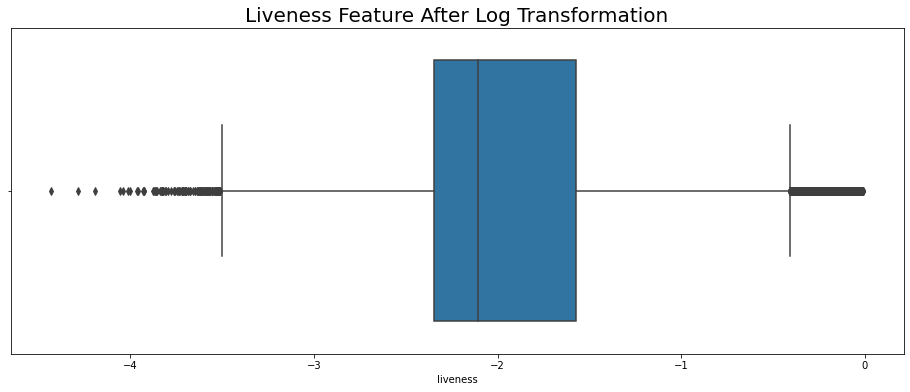

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(df_pred['liveness']) 
ax.set_title('Liveness Feature After Log Transformation' , fontsize=20)

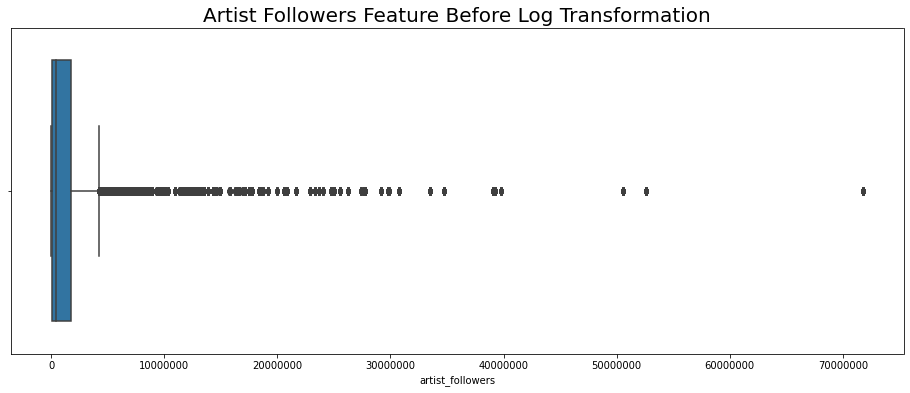

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(df['artist_followers']) 
ax.set_title('Artist Followers Feature Before Log Transformation' , fontsize=20)
ax.get_xaxis().get_major_formatter().set_scientific(False)

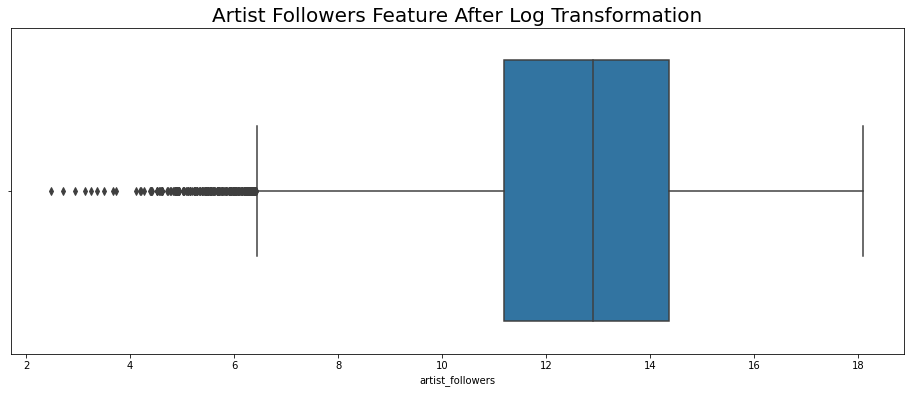

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(df_pred['artist_followers']) 
ax.set_title('Artist Followers Feature After Log Transformation', fontsize=20)
ax.get_xaxis().get_major_formatter().set_scientific(False)

Text(0.5, 0, 'popularity')

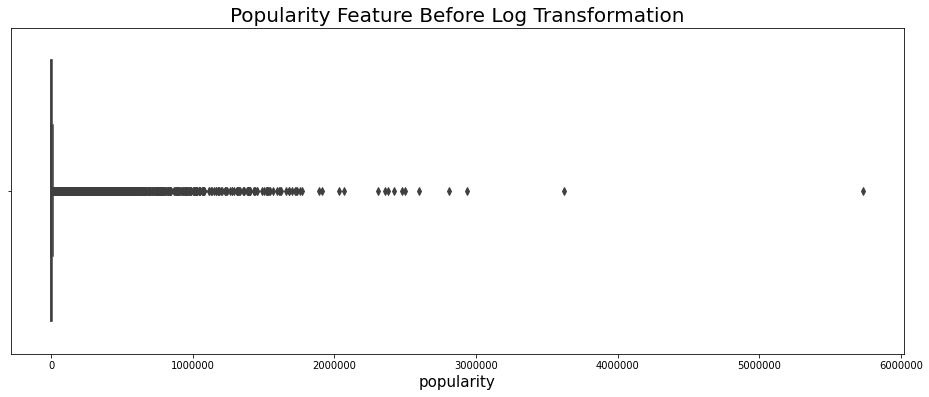

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(df['popularity']) 
ax.set_title('Popularity Feature Before Log Transformation', fontsize=20)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.set_xlabel("popularity",fontsize=15)

Text(0.5, 0, 'popularity')

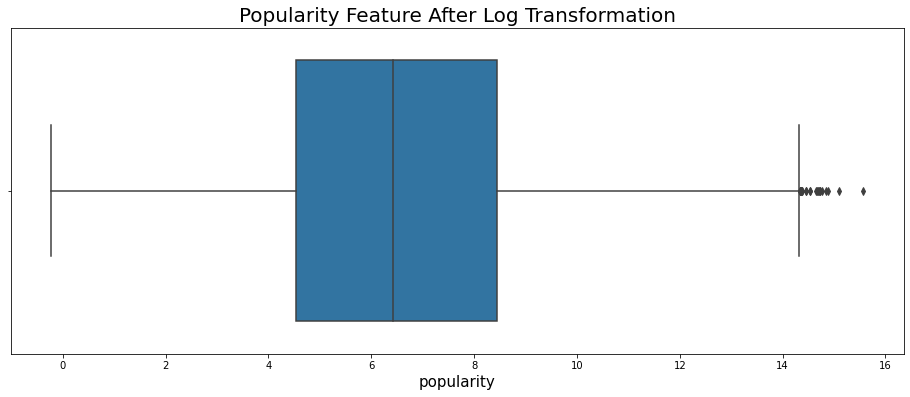

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(df_pred['popularity']) 
ax.set_title('Popularity Feature After Log Transformation', fontsize=20)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.set_xlabel("popularity",fontsize=15)

## Boxplot of log+1 - transformed features

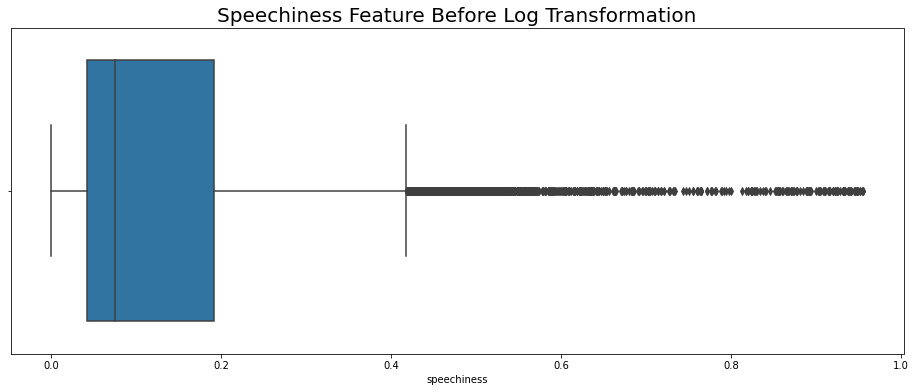

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(df['speechiness']) 
ax.set_title('Speechiness Feature Before Log Transformation', fontsize=20)
ax.get_xaxis().get_major_formatter().set_scientific(False)

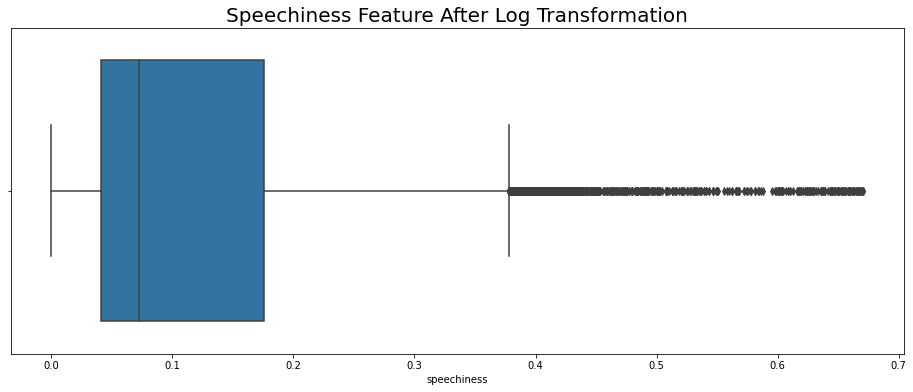

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(df_pred['speechiness']) 
ax.set_title('Speechiness Feature After Log Transformation', fontsize=20)
ax.get_xaxis().get_major_formatter().set_scientific(False)

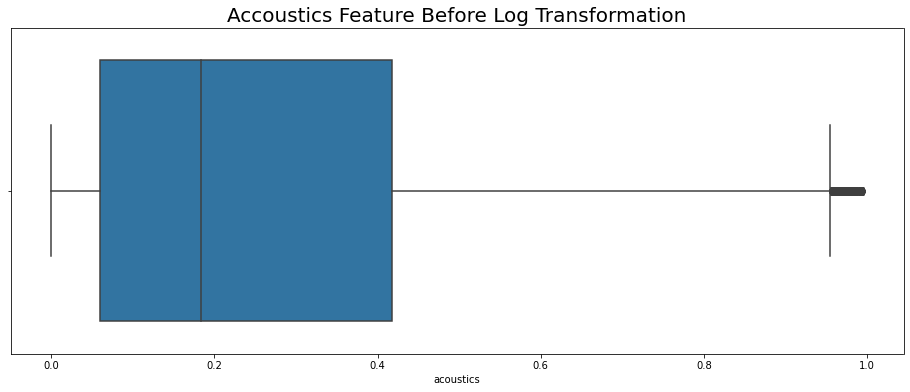

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(df['acoustics']) 
ax.set_title('Accoustics Feature Before Log Transformation', fontsize=20)
ax.get_xaxis().get_major_formatter().set_scientific(False)

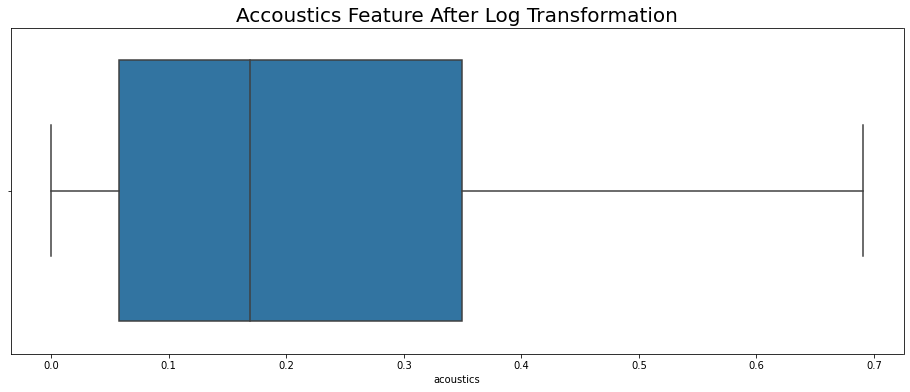

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(df_pred['acoustics']) 
ax.set_title('Accoustics Feature After Log Transformation', fontsize=20)
ax.get_xaxis().get_major_formatter().set_scientific(False)

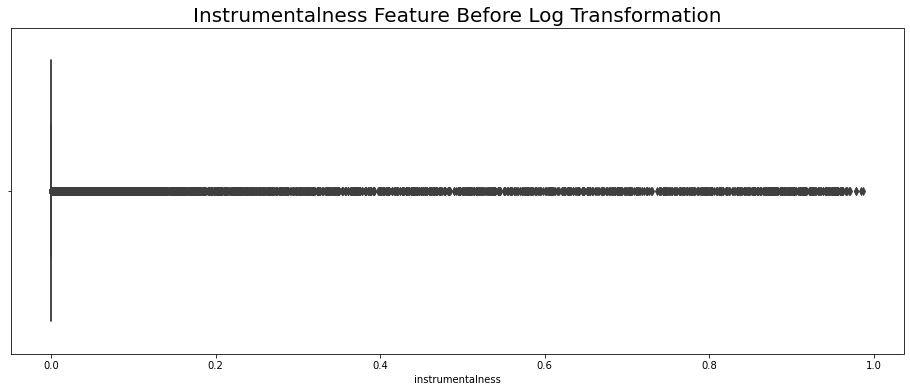

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(df['instrumentalness']) 
ax.set_title('Instrumentalness Feature Before Log Transformation', fontsize=20)
ax.get_xaxis().get_major_formatter().set_scientific(False)

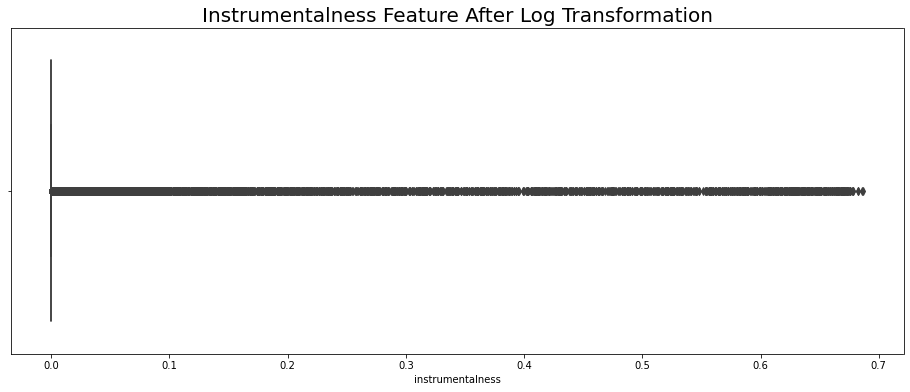

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(df_pred['instrumentalness']) 
ax.set_title('Instrumentalness Feature After Log Transformation', fontsize=20)
ax.get_xaxis().get_major_formatter().set_scientific(False)

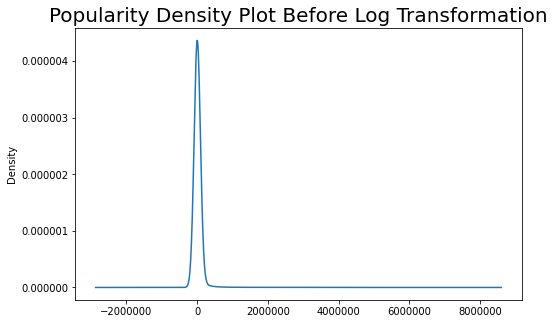

In [ ]:
plt.figure(figsize=(8, 5))
ax = df['popularity'].plot.kde(bw_method=1) 
ax.set_title('Popularity Density Plot Before Log Transformation', fontsize=20)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_xlabel("popularity",fontsize=15)

Text(0.5, 1.0, 'Popularity Density Plot After Log Transformation')

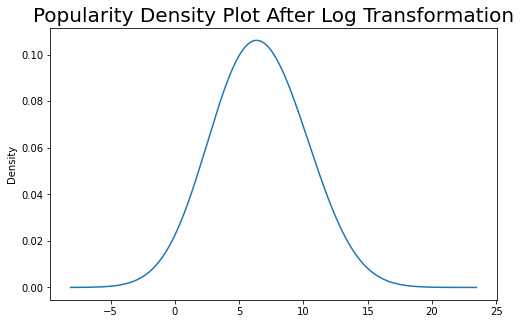

In [ ]:
plt.figure(figsize=(8, 5))
ax = df_pred['popularity'].plot.kde(bw_method=1) 
ax.set_title('Popularity Density Plot After Log Transformation', fontsize=20)

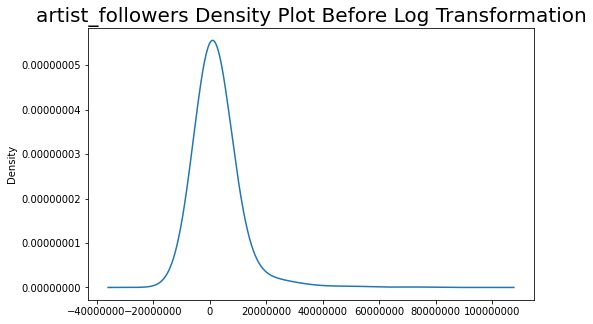

In [ ]:
plt.figure(figsize=(8, 5))
ax = df['artist_followers'].plot.kde(bw_method=1) 
ax.set_title('artist_followers Density Plot Before Log Transformation', fontsize=20)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

Text(0.5, 1.0, 'artist_followers Density Plot After Log Transformation')

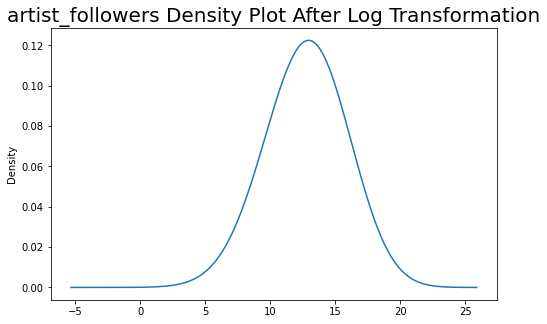

In [ ]:
plt.figure(figsize=(8, 5))
ax = df_pred['artist_followers'].plot.kde(bw_method=1) 
ax.set_title('artist_followers Density Plot After Log Transformation', fontsize=20)

## Removing Outliers

According the distributions of features, outliers removed.
* First method is Z-score method for the features whose distribution is close to the normal distribution, drop those farther than 3 standard deviations from the mean.

* Second method is interquartile range method for the features whose distribution is collected on one side.Outliers are calculated by the difference between the first quarter and the third quarter and determines the min and max points accordingly.


In [ ]:
def remove_outliers(df,name='feature'):
    #Store the 25th and 75th percentile 
    q25,q75=np.percentile(df[name],25),np.percentile(df[name],75)
    #Calculate the Interquartile range
    iqr_cut=1.5*(q75-q25)
    #Create variable of lower and upper cut
    lower,upper=q25-iqr_cut,q75+iqr_cut
    #Remove the outliers
    df=df[(df[name] >= lower) & (df[name] <= upper)]
    return df

def remove_outliers_gaussian(df,name='feature'):
    #calculate the mean and standard deviation
    mean,std=np.mean(df[name]),np.std(df[name])
    #create the cut variable
    std_cut= 3*std
    #create variable of lower and upper cut
    lower,upper=mean-std_cut,mean+std_cut
    #Remove outliers
    df=df[(df[name] >= lower) & (df[name] <= upper)]
    return df

In [ ]:
df1 = df_pred.copy()

In [ ]:
df1 = df_pred.copy()
print(len(df1))
df1=remove_outliers(df1,'artist_followers')
print(len(df1))

59467
59170


In [ ]:
df1 = df_pred.copy()
print(len(df1))
df1=remove_outliers(df1,'instrumentalness')
print(len(df1))

59467
46987


In [ ]:
df1 = df_pred.copy()
print(len(df1))
df1=remove_outliers(df1,'duration_min')
print(len(df1))

59467
57515


In [ ]:
df1 = df_pred.copy()
print(len(df1))
df1=remove_outliers(df1,'popularity')
print(len(df1))

59467
59444


In [ ]:
df1 = df_pred.copy()
print(len(df1))
df1=remove_outliers(df1,'acoustics')
print(len(df1))

59467
59467


In [ ]:
df1 = df_pred.copy()
print(len(df1))
df1=remove_outliers(df1,'speechiness')
print(len(df1))

59467
58370


In [ ]:
df1 = df_pred.copy()
print(len(df1))
df1=remove_outliers(df1,'liveness')
print(len(df1))

59467
58202


In [ ]:
df1 = df_pred.copy()
print(len(df1))
df1=remove_outliers(df1,'danceability')
print(len(df1))

59467
58976


In [ ]:
df1 = df_pred.copy()
print(len(df1))
df1=remove_outliers_gaussian(df1,'loudness')
print(len(df1))

59467
58618


In [ ]:
df1 = df_pred.copy()
print(len(df1))
df1=remove_outliers_gaussian(df1,'energy')
print(len(df1))

59467
59184


In [ ]:
df1 = df_pred.copy()
print(len(df1))
df1=remove_outliers_gaussian(df1,'valence')
print(len(df1))

59467
59467


In [ ]:
df1 = df_pred.copy()
print(len(df1))
df1=remove_outliers_gaussian(df1,'tempo')
print(len(df1))

59467
59421


**Min-Max Scaling**

In [ ]:
numerical_cols=df_pred.select_dtypes(include=['float64','int64']).columns.tolist()
encoded_cols=['mode']
categorical_cols=df_pred.select_dtypes(include=['object']).columns.tolist()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_numeric = scaler.fit_transform(df_pred[numerical_cols])
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=df_pred[numerical_cols].columns)
scaled_numeric_df.describe()

,artist_followers,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,duration_min,popularity
count,59467.000000,59467.000000,59467.000000,59467.000000,59467.000000,59467.000000,59467.000000,59467.000000,59467.000000,59467.000000,59467.000000,59467.000000,59467.000000,59467.000000,59467.000000
mean,0.658719,0.676490,0.641117,0.485304,0.814175,0.548792,0.176662,0.317960,0.016885,0.562000,0.508448,0.527070,0.791827,0.395087,0.428980
std,0.146684,0.149859,0.175699,0.328914,0.058294,0.497618,0.151839,0.271802,0.097377,0.138384,0.225961,0.123784,0.064863,0.049723,0.165017
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.557927,0.579858,0.534781,0.181818,0.787394,0.000000,0.060797,0.083957,0.000000,0.471651,0.332659,0.427444,0.800000,0.368245,0.301692
50%,0.667521,0.693795,0.660109,0.545455,0.823046,1.000000,0.108156,0.244550,0.000000,0.526321,0.503539,0.521227,0.800000,0.395396,0.420461
75%,0.761612,0.787386,0.770398,0.818182,0.851979,1.000000,0.261986,0.505683,0.000055,0.646966,0.681496,0.607952,0.800000,0.422656,0.549722
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


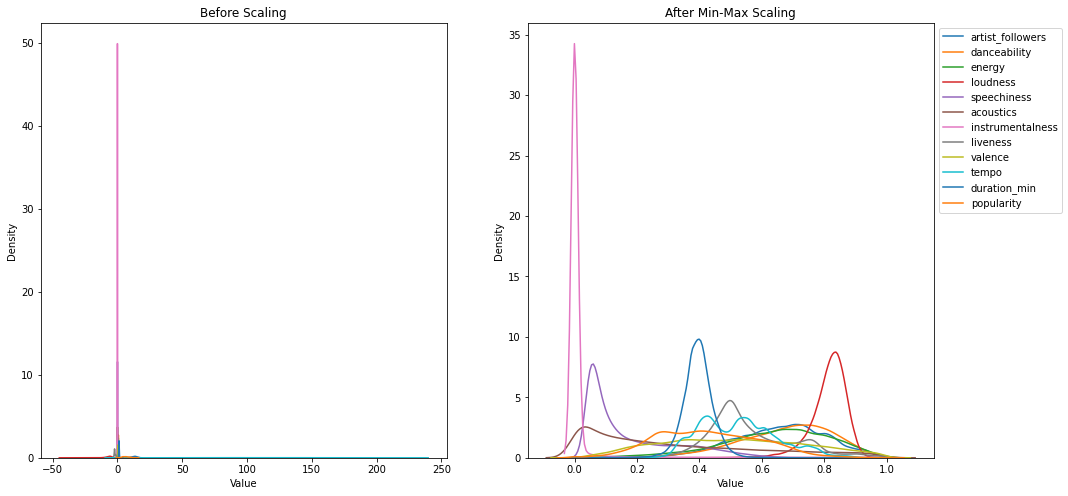

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
ax1.set_title('Before Scaling')
sns.kdeplot(df_pred['artist_followers'], ax=ax1)
sns.kdeplot(df_pred['danceability'], ax=ax1)
sns.kdeplot(df_pred['energy'], ax=ax1)
sns.kdeplot(df_pred['loudness'], ax=ax1)
sns.kdeplot(df_pred['speechiness'], ax=ax1)
sns.kdeplot(df_pred['acoustics'], ax=ax1)
sns.kdeplot(df_pred['instrumentalness'], ax=ax1)
sns.kdeplot(df_pred['liveness'], ax=ax1)
sns.kdeplot(df_pred['valence'], ax=ax1)
sns.kdeplot(df_pred['tempo'], ax=ax1)
sns.kdeplot(df_pred['duration_min'], ax=ax1)
sns.kdeplot(df_pred['popularity'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_numeric_df['artist_followers'], ax=ax2)
sns.kdeplot(scaled_numeric_df['danceability'], ax=ax2)
sns.kdeplot(scaled_numeric_df['energy'], ax=ax2)
sns.kdeplot(scaled_numeric_df['loudness'], ax=ax2)
sns.kdeplot(scaled_numeric_df['speechiness'], ax=ax2)
sns.kdeplot(scaled_numeric_df['acoustics'], ax=ax2)
sns.kdeplot(scaled_numeric_df['instrumentalness'], ax=ax2)
sns.kdeplot(scaled_numeric_df['liveness'], ax=ax2)
sns.kdeplot(scaled_numeric_df['valence'], ax=ax2)
sns.kdeplot(scaled_numeric_df['tempo'], ax=ax2)
sns.kdeplot(scaled_numeric_df['duration_min'], ax=ax2)
sns.kdeplot(scaled_numeric_df['popularity'], ax=ax2)
plt.legend(labels=["artist_followers","danceability", "energy", "loudness", "speechiness", "acoustics", "instrumentalness", "liveness", "valence", "tempo", "duration_min", "popularity"], loc = 2, bbox_to_anchor = (1,1))
ax1.set(xlabel="Value")
ax2.set(xlabel="Value")
plt.show()

In [ ]:
numeric_features = ['popularity', 'artist_followers', 'danceability', 'energy', 
                    'loudness', 'speechiness', 'acoustics', 'instrumentalness', 
                    'liveness', 'valence', 'tempo', 'duration_min']

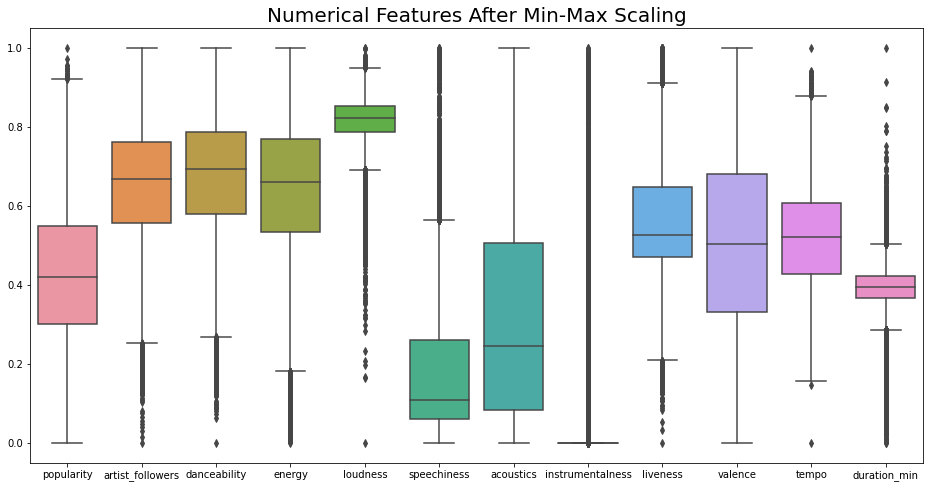

In [ ]:
fig = plt.figure(figsize=(16,8))
sns.boxplot(data=scaled_numeric_df[numeric_features]).set_title('Numerical Features After Min-Max Scaling', fontsize=20)
fig.show()

In [ ]:
X = scaled_numeric_df.drop(columns=['popularity', 'time_signature'])
y = scaled_numeric_df['popularity']
# y = df_pred['popularity']

**Split the dataset**

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
train_pred = lm.predict(X_train)
test_pred = lm.predict(X_test)
val_pred = lm.predict(X_val)
adjusted_r2_square_train = 1 - (1 - lm.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adjusted_r2_square_val = 1 - (1 - lm.score(X_val, y_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)
adjusted_r2_square_test = 1 - (1 - lm.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

print('Validation set evaluation:\n_____________________________________')
print_evaluate(y_val, val_pred)

results_val_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_val, val_pred), adjusted_r2_square_train, cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Adjusted R2 Square', "Cross Validation"])

results_train_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_train, train_pred), adjusted_r2_square_val, cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Adjusted R2 Square', "Cross Validation"])

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred), adjusted_r2_square_test, cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Adjusted R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 0.13073790396176105
MSE: 0.025310523280640308
RMSE: 0.1590928134160695
R2 Square 0.06697635334766172
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.13124876327462778
MSE: 0.025490796834049458
RMSE: 0.15965837539587285
R2 Square 0.07141037576388731
__________________________________
Validation set evaluation:
_____________________________________
MAE: 0.12969147375493673
MSE: 0.024891707761009272
RMSE: 0.15777106122799983
R2 Square 0.06645039846960221
__________________________________


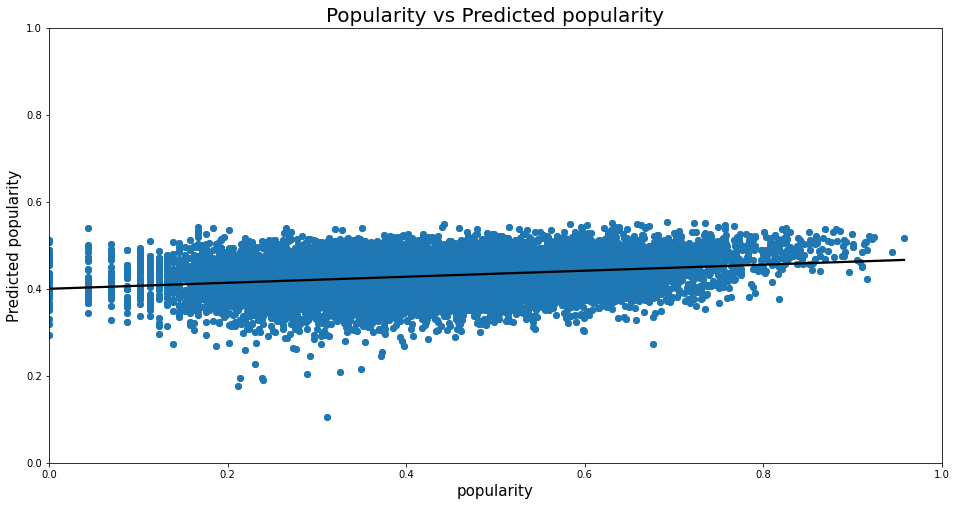

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.scatter(y_val, val_pred)
plt.xlabel("Popularity",fontsize=15)
plt.ylabel("Predicted popularity",fontsize=15)
plt.title("Popularity vs Predicted popularity", fontsize=20)
plt.ylim([0, 1])
plt.xlim([0, 1])
sns.regplot(y_val,val_pred,line_kws={"color": "black"})
plt.savefig('lm_popularity_scaled_val.jpg', dpi=300, bbox_inches='tight')


## Regression: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor() 

dt_reg.fit(X_train, y_train)

test_pred = dt_reg.predict(X_test)
train_pred = dt_reg.predict(X_train)
val_pred = dt_reg.predict(X_val)
adjusted_r2_square_train = 1 - (1 - dt_reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adjusted_r2_square_val = 1 - (1 - dt_reg.score(X_val, y_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)
adjusted_r2_square_test = 1 - (1 - dt_reg.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

print('Validation set evaluation:\n_____________________________________')
print_evaluate(y_val, val_pred)

results_val_df_2 = pd.DataFrame(data=[["Decision Tree Regressor", *evaluate(y_val, val_pred), adjusted_r2_square_train, cross_val(DecisionTreeRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Adjusted R2 Square', 'Cross Validation'])

results_train_df_2 = pd.DataFrame(data=[["Decision Tree Regressor", *evaluate(y_train, train_pred), adjusted_r2_square_val, cross_val(DecisionTreeRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Adjusted R2 Square', 'Cross Validation'])

results_df_2 = pd.DataFrame(data=[["Decision Tree Regressor", *evaluate(y_test, test_pred), adjusted_r2_square_test, cross_val(DecisionTreeRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Adjusted R2 Square', 'Cross Validation'])

results_df = results_df.append(results_df_2, ignore_index=True)
results_train_df = results_train_df.append(results_train_df_2, ignore_index=True)
results_val_df = results_val_df.append(results_val_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.1741861790083299
MSE: 0.04821460782187308
RMSE: 0.21957824988343697
R2 Square -0.7773385683529155
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0030268312849500625
MSE: 0.00033146251371333384
RMSE: 0.018206111987827983
R2 Square 0.9879253421122447
__________________________________
Validation set evaluation:
_____________________________________
MAE: 0.1749744123009164
MSE: 0.048496832553446605
RMSE: 0.2202199640210819
R2 Square -0.818846627175764
__________________________________


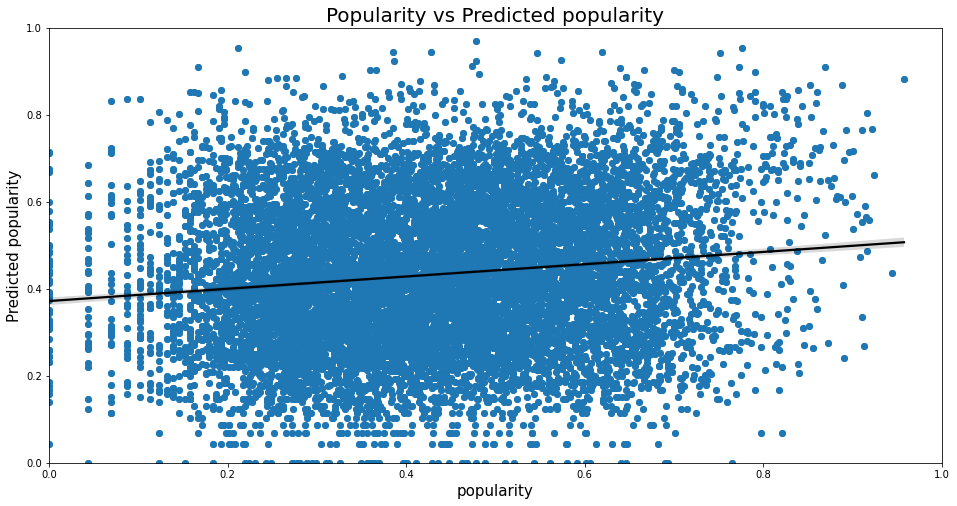

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.scatter(y_val, val_pred)
plt.xlabel("popularity",fontsize=15)
plt.ylabel("Predicted popularity",fontsize=15)
plt.title("Popularity vs Predicted popularity", fontsize=20)
plt.ylim([0, 1])
plt.xlim([0, 1])
sns.regplot(y_val,val_pred,line_kws={"color": "black"})
plt.savefig('dt_popularity_scaled_val.jpg', dpi=300, bbox_inches='tight')

In [ ]:
dt_reg.feature_importances_

array([0.1464892 , 0.09040582, 0.08139979, 0.04090929, 0.08841497,
       0.00715516, 0.08989378, 0.08771294, 0.04545485, 0.07499587,
       0.08011518, 0.08009553, 0.08695762])

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(16,8))
# tree.plot_tree(dt_reg, feature_names=['artist_followers', 'danceability', 'energy', 'key', 'loudness',
#        'mode', 'speechiness', 'acoustics', 'instrumentalness', 'liveness',
#        'valence', 'tempo', 'duration_min'])
# plt.savefig('dt_plot.jpg', dpi=300, bbox_inches='tight')

<Figure size 1152x576 with 0 Axes>

### Hyperparameter for Decision Tree

In [ ]:
# Hyper parameters range intialization for tuning
parameters={"splitter":["best","random"],
           "max_depth" : [None, 1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(dt_reg, param_grid=parameters, scoring="neg_mean_absolute_error", cv=5, verbose=3)

In [ ]:
%%capture
from datetime import datetime

# function for calculating how much time take for hyperparameter tuning
def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [ ]:
start_time=timer(None)

# tuning_model.fit(X_train,y_train)

timer(start_time)

In [ ]:
# best hyperparameters
# tuning_model.best_params_

# RESULT
# {'max_depth': 5,
#  'max_features': 'auto',
#  'max_leaf_nodes': 30,
#  'min_samples_leaf': 9,
#  'min_weight_fraction_leaf': 0.1,
#  'splitter': 'best'}

In [ ]:
# best model score
# tuning_model.best_score_

# RESULT 1
# -0.02574583383059562

In [ ]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=30,min_samples_leaf=9,min_weight_fraction_leaf=0.1,splitter='best')
tuned_hyper_model.fit(X_train,y_train)
test_pred = tuned_hyper_model.predict(X_test)
train_pred = tuned_hyper_model.predict(X_train)
val_pred = tuned_hyper_model.predict(X_val)
adjusted_r2_square_train = 1 - (1 - tuned_hyper_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adjusted_r2_square_val = 1 - (1 - tuned_hyper_model.score(X_val, y_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)
adjusted_r2_square_test = 1 - (1 - tuned_hyper_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

print('Validation set evaluation:\n_____________________________________')
print_evaluate(y_val, val_pred)

results_val_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Regressor", *evaluate(y_val, val_pred), adjusted_r2_square_train, cross_val(DecisionTreeRegressor())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Adjusted R2 Square', 'Cross Validation'])

results_train_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Regressor", *evaluate(y_train, train_pred), adjusted_r2_square_train, cross_val(DecisionTreeRegressor())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Adjusted R2 Square', 'Cross Validation'])

results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Regressor", *evaluate(y_test, test_pred), adjusted_r2_square_train, cross_val(DecisionTreeRegressor())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Adjusted R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_train_df = results_train_df.append(results_train_df_2, ignore_index=True)
results_val_df = results_val_df.append(results_val_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.13146330941262088
MSE: 0.025565033772765887
RMSE: 0.15989069320246843
R2 Square 0.05759431470542142
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.1320829393613675
MSE: 0.025806406059446993
RMSE: 0.1606437239964481
R2 Square 0.059913228227648774
__________________________________
Validation set evaluation:
_____________________________________
MAE: 0.13048581027780495
MSE: 0.02516947208248211
RMSE: 0.1586488956232665
R2 Square 0.05603300267980793
__________________________________


In [ ]:
tuned_hyper_model.feature_importances_

array([0.78767496, 0.16756448, 0.        , 0.        , 0.01868348,
       0.        , 0.        , 0.        , 0.02607708, 0.        ,
       0.        , 0.        , 0.        ])

In [ ]:
tuned_hyper_model.feature_names_in_

array(['artist_followers', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acoustics', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_min'], dtype=object)

In [ ]:
tuned_hyper_model.max_features_

13

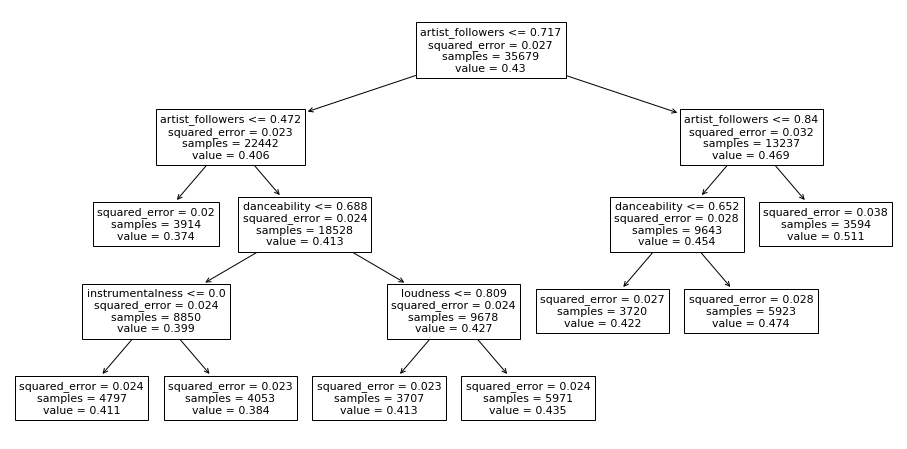

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(16,8))
tree.plot_tree(tuned_hyper_model, feature_names=['artist_followers', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acoustics', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_min'])
plt.savefig('tuned_dt_plot.jpg', dpi=300, bbox_inches='tight')

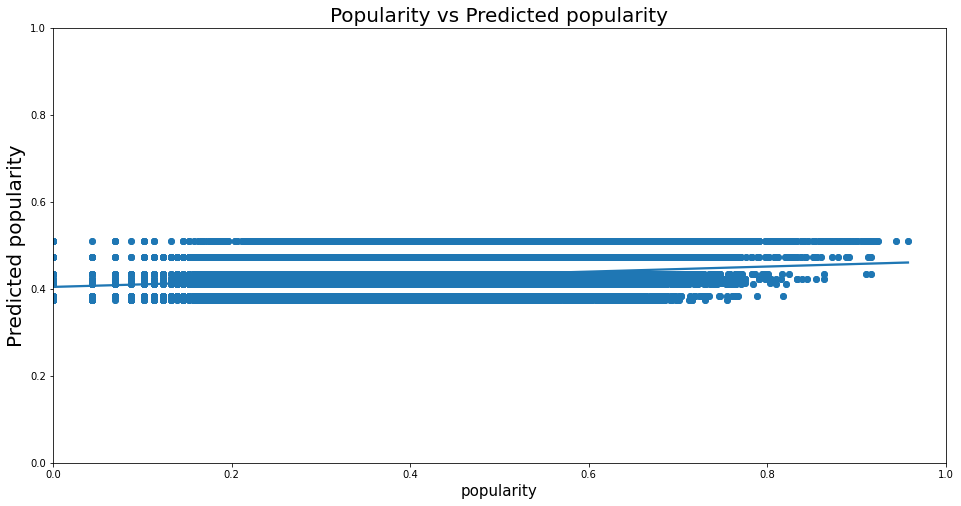

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.scatter(y_val, val_pred)
plt.xlabel("Popularity", fontsize=15)
plt.ylabel("Predicted popularity", fontsize=20)
plt.title("Popularity vs Predicted popularity", fontsize=20)
sns.regplot(y_val,val_pred)
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.savefig('tuned_dt_popularity_scaled_val.jpg', dpi=300, bbox_inches='tight')

In [ ]:
# Validation result
results_val_df

,Model,MAE,MSE,RMSE,R2 Square,Adjusted R2 Square,Cross Validation
0,Linear Regression,0.129691,0.024892,0.157771,0.066450,0.071072,0.066925
1,Decision Tree Regressor,0.173731,0.047869,0.218789,-0.795282,0.987921,-0.829999
2,Tuned Decision Tree Regressor,0.130486,0.025169,0.158649,0.056033,0.059571,-0.827580


In [ ]:
# Train result
results_train_df

,Model,MAE,MSE,RMSE,R2 Square,Adjusted R2 Square,Cross Validation
0,Linear Regression,0.131249,0.025491,0.159658,0.071410,0.065429,0.066925
1,Decision Tree Regressor,0.003027,0.000331,0.018206,0.987925,-0.797247,-0.827261
2,Tuned Decision Tree Regressor,0.132083,0.025806,0.160644,0.059913,0.059571,-0.829676


In [ ]:
# Test result
results_df

,Model,MAE,MSE,RMSE,R2 Square,Adjusted R2 Square,Cross Validation
0,Linear Regression,0.130738,0.025311,0.159093,0.066976,0.065955,0.066925
1,Decision Tree Regressor,0.173756,0.047796,0.218623,-0.761906,-0.763834,-0.822551
2,Tuned Decision Tree Regressor,0.131463,0.025565,0.159891,0.057594,0.059571,-0.826109


In [ ]:
scaled_numeric_df['popularity'].describe()

# IQR = 1.5 (Q3 - Q1) = 0,372
# If compare with outlier calculation -> Q3 + IQR = 0,921767 (almost max value, which means MAE is much smaller now in range between 0 - 0,972)
# Comparing to last time, MAE = ~22k and Q3 + IQR = ~6k

count    59467.000000
mean         0.428980
std          0.165017
min          0.000000
25%          0.301692
50%          0.420461
75%          0.549722
max          1.000000
Name: popularity, dtype: float64

*   R-squared is not valid measurement for non-linear regression https://bmcpharma.biomedcentral.com/articles/10.1186/1471-2210-10-6
*   The plot looks discretizing popularity value here, because the model only considers four features (artist_followers, danceability, loudness & instrumentalness), so the algorithm doesn't need that deep tree to calculate the prediction and the result is not that vary compared to the untuned decision tree.

We will try to exclude loudness and instrumentalness

In [ ]:
X = scaled_numeric_df.drop(columns=['popularity', 'time_signature', 'loudness', 'instrumentalness'])
y = scaled_numeric_df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=30,min_samples_leaf=9,min_weight_fraction_leaf=0.1,splitter='best')
tuned_hyper_model.fit(X_train,y_train)
test_pred = tuned_hyper_model.predict(X_test)
train_pred = tuned_hyper_model.predict(X_train)
val_pred = tuned_hyper_model.predict(X_val)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

print('Validation set evaluation:\n_____________________________________')
print_evaluate(y_val, val_pred)

results_val_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Regressor", *evaluate(y_val, val_pred), cross_val(DecisionTreeRegressor())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

results_train_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Regressor", *evaluate(y_train, train_pred), cross_val(DecisionTreeRegressor())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Regressor", *evaluate(y_test, test_pred), cross_val(DecisionTreeRegressor())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_train_df = results_train_df.append(results_train_df_2, ignore_index=True)
results_val_df = results_val_df.append(results_val_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.13145140181092368
MSE: 0.025536925250531195
RMSE: 0.15980276984624264
R2 Square 0.058630481189481554
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.13219510940151488
MSE: 0.025847189120230894
RMSE: 0.16077061025022854
R2 Square 0.058427565486893096
__________________________________
Validation set evaluation:
_____________________________________
MAE: 0.13041633935799293
MSE: 0.025152786517689853
RMSE: 0.15859630045398238
R2 Square 0.05665878547111647
__________________________________


In [ ]:
fig = plt.figure(figsize=(16,8))
plt.scatter(y_val, val_pred)
plt.xlabel("Popularity")
plt.ylabel("Predicted popularity")
plt.title("Popularity vs Predicted popularity")
sns.regplot(y_val,val_pred,line_kws={"color": "black"})
plt.ylim([0, 1])
plt.xlim([0, 1])

In [ ]:
tuned_hyper_model.feature_importances_